In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as st
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [2]:
#Importation fichier source
data_7 = pd.read_csv(r"C:\Users\elodi\Documents\DATA\Data Analyst\Projets\P7\wid_500.csv")
data_7.head()

,country_code,country,quantile,nb_quantiles,income,gdpppp,gini,avg_income,pj,c_k_parent
0,ALB,Albania,1,100,728.89795,7297.0,0.3,2994.829902,0.815874,1
1,ALB,Albania,2,100,916.66235,7297.0,0.3,2994.829902,0.815874,1
2,ALB,Albania,3,100,1010.91600,7297.0,0.3,2994.829902,0.815874,1
3,ALB,Albania,4,100,1086.90780,7297.0,0.3,2994.829902,0.815874,1
4,ALB,Albania,5,100,1132.69970,7297.0,0.3,2994.829902,0.815874,1


#### Première approche : représentation visuelle selon les 9 pays identifiés lors du clustering

In [3]:
country_list = ['Luxembourg', 'Sweden', 'Spain', 'France', 'Norway', 'United States', 'Denmark', 'Austria', 'Czech Republic	']
data_7_country_list = data_7[data_7['country'].isin(country_list)]

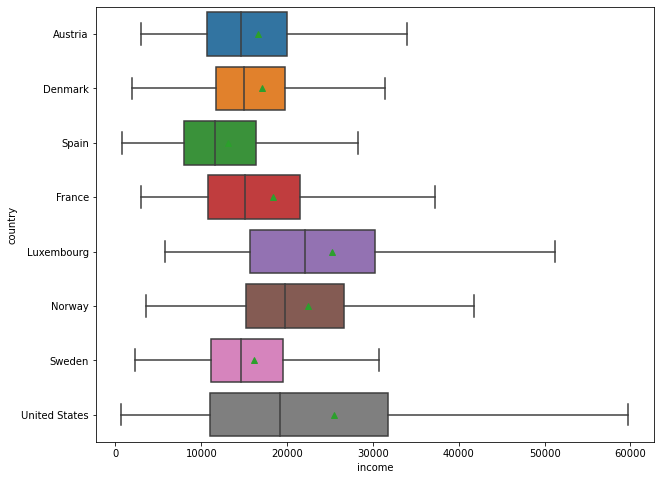

In [4]:
plt.figure(figsize=(10,8))
sns.boxplot(
    data=data_7_country_list, 
    x='income', y='country', 
    showfliers=False, showmeans=True)

plt.savefig('boxplot_panel_income.png')
plt.show()

On constate ici que les données analysées ne semblent pas être de variances égales.

La but est de savoir si ces écarts sont significatifs ou pas. L'ANOVA nous permettra de répondre à cette question.

#### ANOVA
Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle

In [5]:
anova_income = smf.ols('income ~ country', data=data_7).fit()
print(anova_income.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:42:25   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         


R² = 0.496, on peut en conclure que la variable explicative Pays explique près de 50% de la variance du revenu de l'individu. Le reste, donc la moitié de la variance sur le revenu, est expliquée par les autres facteurs non considérés dans ce modèle.

#### Test de fisher
Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test ( 0 ) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle α1=α2=α3=α4=0 .

Le pays a donc bien un effet sur les revenus

In [6]:
sm.stats.anova_lm(anova_income, typ=2)

,sum_sq,df,F,PR(>F)
country,2.551188e+14,115.0,49710.758889,0.0
Residual,2.588293e+14,5799884.0,NaN,NaN


In [7]:
test=sm.stats.anova_lm(anova_income, typ=2)
SCE=test.iloc[0,0]
SCR=test.iloc[1,0]
variab_pays=SCE/(SCE+SCR)

variab_pays

0.49639014230948464

#### 1ère régression linéaire 
Régression linéaire sur nos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par le(s) modèle(s) ?

In [8]:
rl_1 = smf.ols('income ~ gini + avg_income', data=data_7).fit()
print(rl_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:42:28   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.903e-10     14.960   1.94e-11      1.0

Ce modèle n'explique que 50% de la variance, nous ne sommes pas plus performants que l'ANOVA. Il peut s'agir d'un problème de linéarité, car les salaires ont tendance à évoluer de manière exponentielle.

##### Visualisation

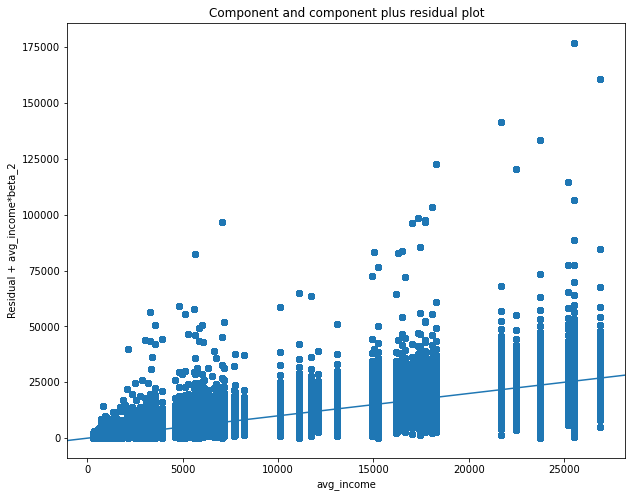

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = sm.graphics.plot_ccpr(rl_1, "avg_income", ax=ax)

#### 2ème régression linéaire 
Logarithme du Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu

Ajout des colonnes de log

In [10]:
data_7['ln_avg_income'] = np.log(data_7['avg_income'])

In [11]:
data_7['ln_income'] = np.log(data_7['income'])

In [12]:
#2ème régression linéaire
rl_2 = smf.ols('ln_income ~ gini + ln_avg_income', data=data_7).fit()
print(rl_2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.773e+06
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:42:40   Log-Likelihood:            -6.3237e+06
No. Observations:             5800000   AIC:                         1.265e+07
Df Residuals:                 5799997   BIC:                         1.265e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4713      0.003    162.377

Ce modèle basé sur le logarithme de l'income et average income est donc meilleur que le premier. Le R2 est ici de 0.729

##### Visualisation

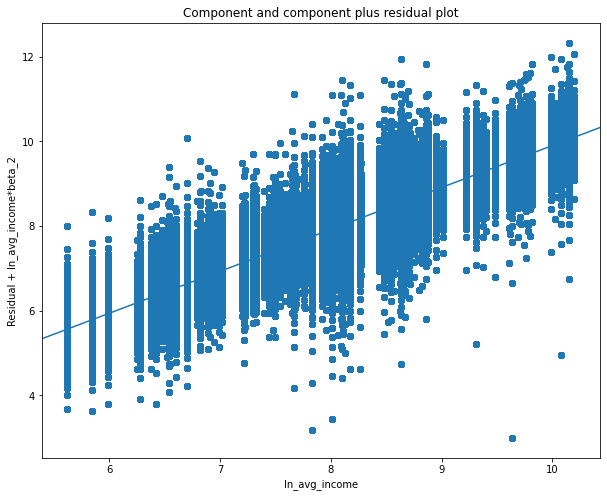

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = sm.graphics.plot_ccpr(rl_2, "ln_avg_income", ax=ax)

In [14]:
anova_table_gini_ln = sm.stats.anova_lm(rl_2, typ=2)
anova_table_gini_ln["eta_sq"] = anova_table_gini_ln[:-1]['sum_sq']/sum(anova_table_gini_ln['sum_sq'])
anova_table_gini_ln

,sum_sq,df,F,PR(>F),eta_sq
gini,1.093747e+05,1.0,2.110422e+05,0.0,0.010781
ln_avg_income,7.030267e+06,1.0,1.356513e+07,0.0,0.692941
Residual,3.005907e+06,5799997.0,NaN,NaN,NaN


In [15]:
#Autre méthode de calcul de la variance expliquée du modèle
var_exp_model = round((rl_2.ess / rl_2.centered_tss)*100,2)
var_exp_model

72.83

Décomposition de la variance :

In [16]:
var_exp_pays = round(sum(anova_table_gini_ln[0:2]["eta_sq"])*100,2)
print("Le pourcentage de la variance expliquée par le pays de naissance est donc de :",var_exp_pays,"%")

Le pourcentage de la variance expliquée par le pays de naissance est donc de : 70.37 %


In [17]:
var_exp_autres = round(var_exp_model - var_exp_pays,2)
print("Le pourcentage de la variance expliquée par les autres facteurs non considérés est donc de :",var_exp_autres,"%")

Le pourcentage de la variance expliquée par les autres facteurs non considérés est donc de : 2.46 %


In [18]:
#Variance totale SCT
rl_2.centered_tss

11062516.886050463

In [19]:
#Variance expliquée SCE
rl_2.ess

8056609.94861871

In [20]:
#Variance résiduelle SCR
rl_2.ssr

3005906.9374317527

#### 3eme régression linéaire
Amélioration du dernier modèle avec la classe de revenus des parents

In [21]:
rl_3 = smf.ols('ln_income ~ ln_avg_income + gini + c_k_parent', data=data_7).fit()
print(rl_3.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 5.386e+06
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:42:52   Log-Likelihood:            -6.2418e+06
No. Observations:             5800000   AIC:                         1.248e+07
Df Residuals:                 5799996   BIC:                         1.248e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2600      0.003     89.386

In [22]:
anova_table_global_ln = sm.stats.anova_lm(rl_3, typ=2)
anova_table_global_ln["eta_sq"] = anova_table_global_ln[:-1]['sum_sq']/sum(anova_table_global_ln['sum_sq'])
anova_table_global_ln

,sum_sq,df,F,PR(>F),eta_sq
ln_avg_income,7.031635e+06,1.0,1.395667e+07,0.0,0.692990
gini,1.092639e+05,1.0,2.168715e+05,0.0,0.010768
c_k_parent,8.375977e+04,1.0,1.662498e+05,0.0,0.008255
Residual,2.922147e+06,5799996.0,NaN,NaN,NaN


Pourcentage de variance expliquée par ce modèle

In [23]:
var_exp_pays_ci_parents = round(sum(anova_table_global_ln[0:-1]["eta_sq"])*100,2)
print("Le pourcentage de la variance expliquée par le pays de naissance et la classe des parents est donc de :",var_exp_pays_ci_parents,"%")

Le pourcentage de la variance expliquée par le pays de naissance et la classe des parents est donc de : 71.2 %


In [24]:
var_exp_model_2 = round((rl_2.ess / rl_2.centered_tss)*100,2)
var_exp_autres_2 = round(var_exp_model_2 - var_exp_pays_ci_parents,2)
print("Le pourcentage de la variance expliquée par les autres facteurs non considérés est donc de :",var_exp_autres_2,"%")

Le pourcentage de la variance expliquée par les autres facteurs non considérés est donc de : 1.63 %


Nous allons donc réaliser quelques tests supplémentaires sur ce dernier modèle.

#### Calculer les leviers
L’effet de levier (ou poids) de chaque donnée sur sa propre estimation. Une donnée est considérée comme atypique lorsque cette valeur est inférieure à 0.05.

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de 2* p/n

In [25]:
alpha = .05
n = len(data_7)
p = 3

In [26]:
levier_analyse = data_7.copy()

In [27]:
seuil_levier = 2*p/n

In [28]:
levier_analyse['levier_m_3'] = rl_3.get_influence().hat_matrix_diag

In [29]:
analyse_levier = levier_analyse.groupby('country')[['country', 'levier_m_3']].mean().reset_index()
analyse_levier.head()

,country,levier_m_3
0,Albania,5.180797e-07
1,Argentina,5.770431e-07
2,Armenia,6.868661e-07
3,Austria,7.532104e-07
4,Azerbaijan,5.094554e-07


#### Visualisation 

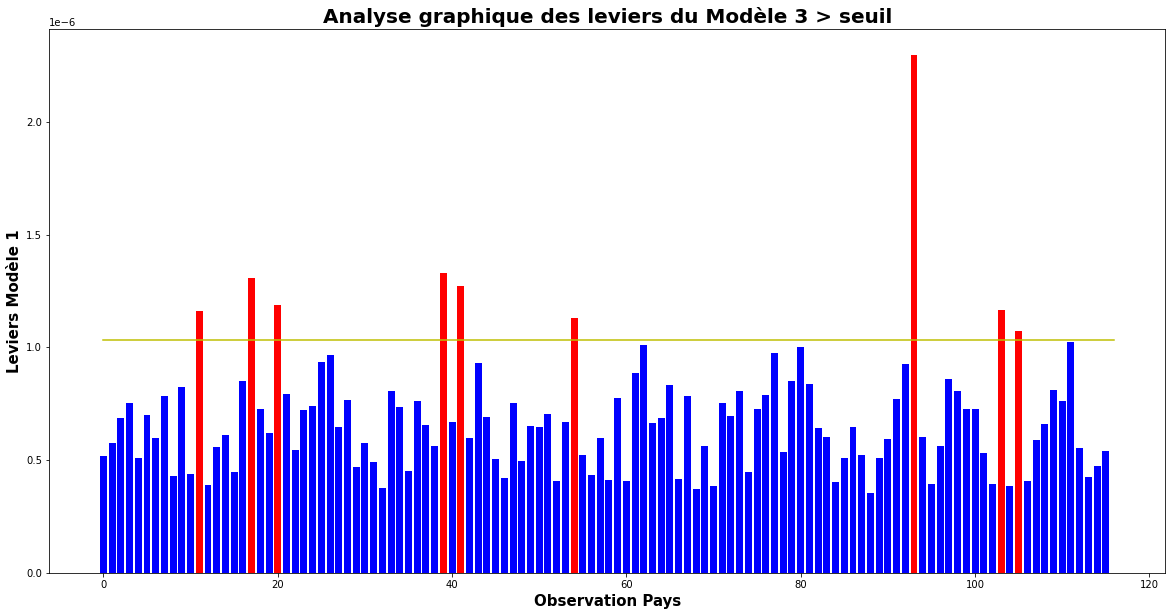

In [30]:
plt.figure(figsize=(20,10))

plt.bar(analyse_levier.loc[analyse_levier['levier_m_3'] <= seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_m_3'] <= seuil_levier]['levier_m_3'], color='b')
plt.bar(analyse_levier.loc[analyse_levier['levier_m_3'] > seuil_levier]['country'].index,
        analyse_levier.loc[analyse_levier['levier_m_3'] > seuil_levier]['levier_m_3'], color='r')
plt.plot([0, 116], [seuil_levier, seuil_levier], color='y')

plt.xlabel('Observation Pays', fontsize=15, fontweight='bold')
plt.ylabel('Leviers Modèle 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des leviers du Modèle 3 > seuil', fontsize=20, fontweight='bold')

plt.savefig('levier_m_3.jpg')
plt.show()

In [31]:
#Liste des pays dont le levier est supérieur au seuil fixé
print('Pays issus du Modèle 3 avec log.')
display(analyse_levier[analyse_levier['levier_m_3'] > seuil_levier]['country'])

Pays issus du Modèle 3 avec log.


11                                   Brazil
17                          Central African
20                                 Colombia
39                                Guatemala
41                                 Honduras
54                                    Kenya
93                             South Africa
103    The Democratic Republic Of The Congo
105                             Timor-Leste
Name: country, dtype: object

In [32]:
print("Modèle 3 (avec log): " + str(round(len(analyse_levier[analyse_levier['levier_m_3'] 
                    > seuil_levier])/len(analyse_levier['levier_m_3'])*100, 2)) + '%')

Modèle 3 (avec log): 7.76%


#### Calcule des résidus studentisés
Les résidus sont dits studentisés lorsqu’ils sont divisés par leur écart-type empirique. Le seuil pour les résidus studentisés est une loi de Student n-p-1à  degrés de liberté et pour les grands échantillons, ils doivent rester compris entre -2 et 2 :

In [33]:
levier_analyse['rstudent_m_3'] = rl_3.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [34]:
residus_student = levier_analyse.groupby(['country', 'quantile']).mean().reset_index()

#### Visualisation 

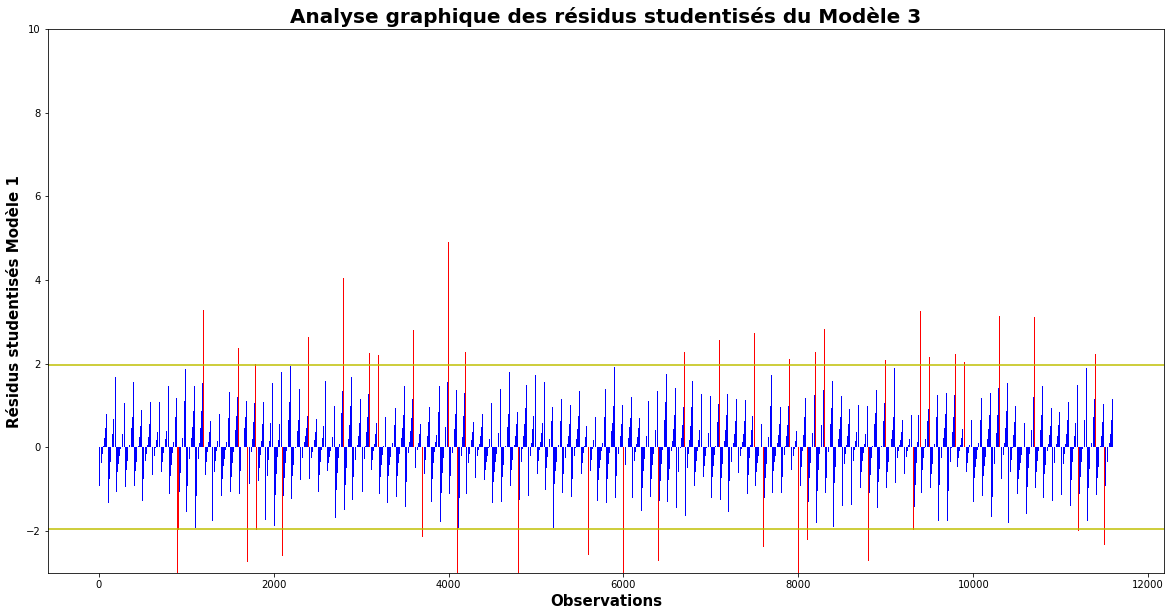

In [35]:
plt.figure(figsize=(20,10))

plt.bar(residus_student[(residus_student['rstudent_m_3'] <= seuil_rstudent) & 
                            (residus_student['rstudent_m_3'] >= -seuil_rstudent)]['country'].index, 
        residus_student[(residus_student['rstudent_m_3'] <= seuil_rstudent) &
                            (residus_student['rstudent_m_3'] >= -seuil_rstudent)]['rstudent_m_3'], color='b')

plt.bar(residus_student[residus_student['rstudent_m_3'] > seuil_rstudent]['country'].index, 
        residus_student[residus_student['rstudent_m_3'] > seuil_rstudent]['rstudent_m_3'], color='r')
plt.bar(residus_student[residus_student['rstudent_m_3'] < -seuil_rstudent]['country'].index, 
        residus_student[residus_student['rstudent_m_3'] < -seuil_rstudent]['rstudent_m_3'], color='r')


plt.axhline(y=seuil_rstudent, color='y', linestyle='-')
plt.axhline(y=-seuil_rstudent, color='y', linestyle='-')

plt.xlabel('Observations', fontsize=15, fontweight='bold')
plt.ylabel('Résidus studentisés Modèle 1', fontsize=15, fontweight='bold')
plt.title('Analyse graphique des résidus studentisés du Modèle 3', fontsize=20, fontweight='bold')

plt.ylim(-3, 10)
plt.savefig('rstudent_m_3.jpg')
plt.show()

In [42]:
print(str(len(residus_student[(residus_student['rstudent_m_3'] > seuil_rstudent) | 
                 (residus_student['rstudent_m_3'] < -seuil_rstudent)])), 
                 'Valeurs influentes dans le Modèle 3 (avec log)')

622 Valeurs influentes dans le Modèle 3 (avec log)


In [43]:
#Pourcentage des observations les plus influentes (hors seuil)
print("Modèle 3 (avec log): " + str((round(635 / len(residus_student['rstudent_m_3'])*100, 2))) + "%")

Modèle 3 (avec log): 5.47%


#### Test de colinéarité 

In [36]:
variables = rl_3.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0642185747001767, 1.064218078454283, 1.0000009381044521]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = rl_3.model.exog
vif = [variance_inflation_factor(variables, exog_idx = i) for i in np.arange(1,variables.shape[1])]

In [45]:
df_vif = pd.DataFrame(index = anova_table_global_ln.index[0:-1], columns = ["VIF"])
df_vif["VIF"] = vif
df_vif

,VIF
ln_avg_income,1.064219
gini,1.064218
c_k_parent,1.000001


#### Testez l’homoscédasticité
On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [37]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(rl_3.resid, variables)
print('p value test Breusch Pagan modèle 3:', pval)

p value test Breusch Pagan modèle 3: 0.0


La p-valeur ici est inférieure à 5 %, on rejette l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

#### Test de la normalité des résidus
Nous allons dans un premier temps réaliser un test de Shapiro-Wilk :

In [38]:
shapiro(rl_3.resid)

C:\Users\elodi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9755378365516663, pvalue=0.0)

On remarque ici que l'hypothèse de normalité est rejetée au niveau de test 5%, mais nous avons un warning dû au grand nombre d'individus. Traçons donc la distribution des résidus avec Seaborn pour vérifier :

C:\Users\elodi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


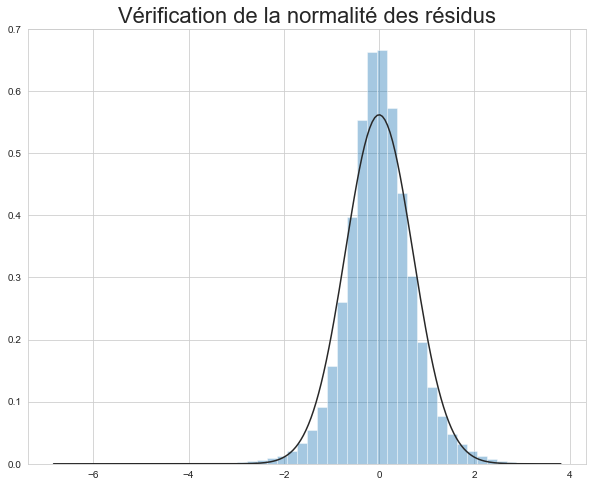

In [39]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
ax = sns.distplot(rl_3.resid, fit=st.norm, kde=False)
ax.set_title("Vérification de la normalité des résidus", fontsize=22)
plt.show()

Sur ce graphique, on remarque donc que la distribution des résidus suit bien une distribution normale. Affichons le QQPlot pour terminer cette analyse.

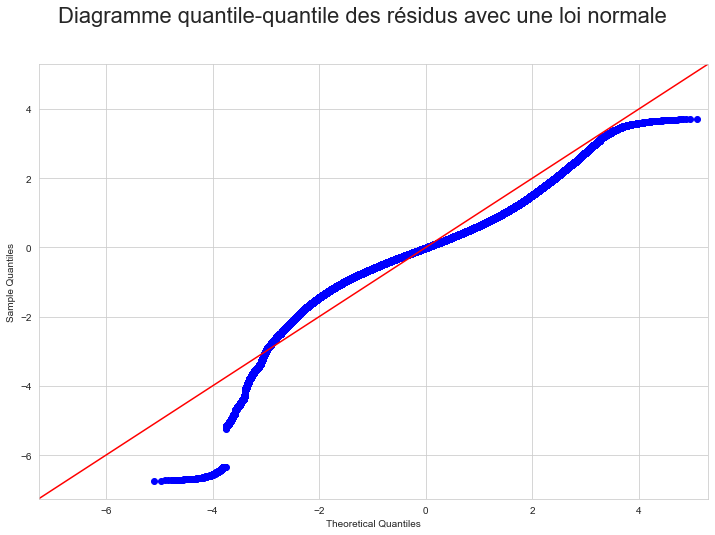

In [40]:
fig = sm.qqplot(rl_3.resid, line="45")
fig.set_size_inches(12, 8)
fig.suptitle("Diagramme quantile-quantile des résidus avec une loi normale", fontsize=22)
plt.show()

### En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?

Comme nous l'avons vu, plus l'indice de Gini est élevé, plus la répartition du pays est inégalitaire. De ce fait, une petite proportion de la population détient la plus grosse part des richesses. Les écarts de salaires sont très élevés avec des revenus par individus faibles.

Le coefficient de régression de l'indice de Gini, ne nous permet pas d'affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu'il n'en défavorise.